In [58]:
import pandas as pd
import numpy as numpy
from sklearn.datasets import load_wine

Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided? Problem Statement: -

Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check if you’re getting similar results with and without PCA).

Business Objective:

The objective for this dataset could be to build a predictive model that classifies wines into different types based on their chemical properties. This model could help wine producers or distributors quickly and accurately categorize wines, ensuring quality control, consistency, and better marketing strategies.

Constraints: Data Quality: Ensure that the dataset is clean, with no missing or erroneous values.

Model Accuracy: The model should be highly accurate in predicting wine types to avoid misclassification, which could lead to incorrect labeling and marketing.

Interpretability: Since the chemical properties of wine are highly specialized, it is crucial for the model to provide insights into which features contribute most to the classification.

Scalability: The model should handle large datasets in the future as more wine varieties and data points are collected.

In [8]:
X,y=load_wine(return_X_y=True)

In [9]:
df=pd.DataFrame(X)

In [10]:
df.sample(5)#it takes random 5 data values

,0,1,2,3,4,5,6,7,8,9,10,11,12
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0
139,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
101,12.60,1.34,1.90,18.5,88.0,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0


In [19]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'cluster'], dtype='object')

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


In [15]:
#lets check  the count of null values
df.isnull().sum()

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
cluster    0
dtype: int64

In [17]:
#lets see the mean median std.deviation,Q1,Q2,Q3 values
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.084270
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.780178
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [25]:
#as we have the data in the file wine.csv in the same folder 
#import the wine dataset
import pandas as pd 
df=pd.read_csv('wine.csv')

In [27]:
#starting 5 rows of all columns
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
df.columns#see all the columns of the given dataset

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [33]:
df.sample()#if parameters are not passed it gives 1 row only

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
18,1,14.19,1.59,2.48,16.5,108,3.3,3.93,0.32,1.86,8.7,1.23,2.82,1680


In [32]:
#if df.sample() have the parameters as numbers then it gives that much number of rows

In [36]:
#lets check  the null values
df.isnull().sum()
#there are no null values present

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [37]:
#lets see the mean,std.deviation,min,max,Q!,Q2,Q3 values
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

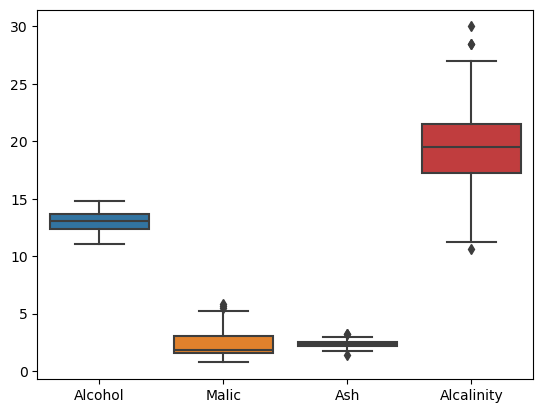

In [42]:
#to understand and check if the outliers are present or not for each of column or feature
#use boxplot
#Boxplot
import seaborn as sns
sns.boxplot(df[['Alcohol','Malic','Ash','Alcalinity']])

<Axes: >

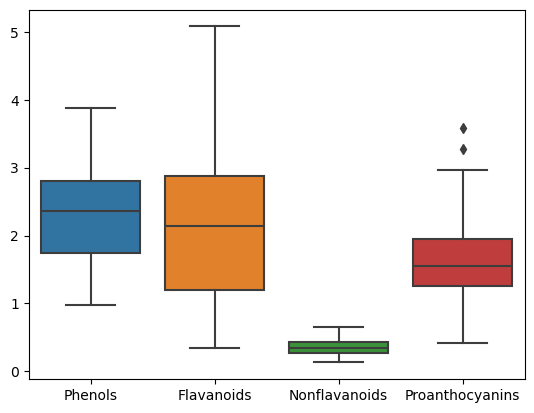

In [45]:
sns.boxplot(df[['Phenols','Flavanoids', 'Nonflavanoids', 'Proanthocyanins']])

<Axes: >

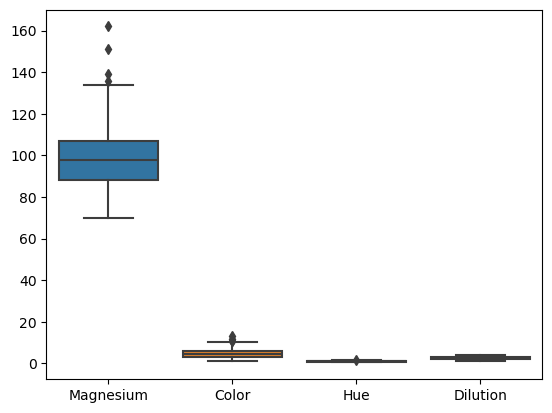

In [48]:
sns.boxplot(df[['Magnesium','Color', 'Hue', 'Dilution']])

In [49]:
outliers_columns=['Malic', 'Ash', 'Alcalinity', 'Magnesium','Proanthocyanins', 'Color', 'Hue']

In [50]:
#from this we are able to see that outliers are present there 
#to treat this outliers we will use log transformation
import numpy as np
# Apply log transformation to the specified columns
for column in outliers_columns:
    # Adding a small constant to avoid issues with log(0)
    df[column] = np.log1p(df[column])

In [51]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,1.154950,1.210498,3.006665,4.603203,2.295112,2.029270,0.361854,0.927749,1.731880,0.664756,2.611685,746.893258
std,0.775035,0.811827,0.309582,0.083078,0.166601,0.135300,0.625851,0.998859,0.124453,0.222247,0.373143,0.118284,0.709990,314.907474
min,1.000000,11.030000,0.553885,0.858662,2.451005,4.262680,0.980000,0.340000,0.130000,0.343590,0.824175,0.392042,1.270000,278.000000
25%,1.000000,12.362500,0.956471,1.166271,2.901422,4.488636,1.742500,1.205000,0.270000,0.810930,1.439827,0.578014,1.937500,500.500000
50%,2.000000,13.050000,1.052567,1.211941,3.020425,4.595120,2.355000,2.135000,0.340000,0.938050,1.738709,0.675489,2.780000,673.500000
75%,3.000000,13.677500,1.406682,1.269057,3.113515,4.682131,2.800000,2.875000,0.437500,1.081805,1.974081,0.751416,3.170000,985.000000
max,3.000000,14.830000,1.916923,1.442202,3.433987,5.093750,3.880000,5.080000,0.660000,1.521699,2.639057,0.996949,4.000000,1680.000000


<Axes: >

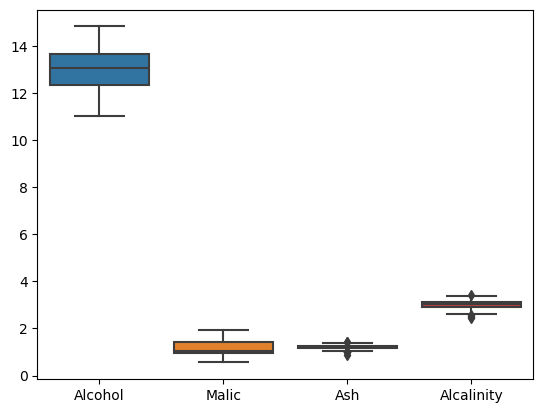

In [53]:
#lets again check the boxplotwheter outliers are traated or not
sns.boxplot(df[['Alcohol','Malic','Ash','Alcalinity']])

<Axes: >

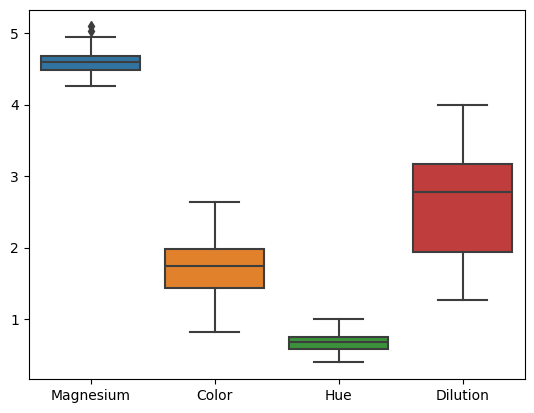

In [54]:
sns.boxplot(df[['Magnesium','Color', 'Hue', 'Dilution']])

In [57]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df= remove_outliers(df,outliers_columns)
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,0.996949,1.232560,2.809403,4.852030,2.80,3.06,0.28,1.190888,1.893112,0.712950,3.92,1065
2,1,13.16,1.211941,1.300192,2.975530,4.624973,2.80,3.24,0.30,1.337629,1.899118,0.708036,3.17,1185
3,1,14.37,1.081805,1.252763,2.879198,4.736198,3.85,3.49,0.24,1.156881,2.174752,0.620576,3.45,1480
4,1,13.24,1.278152,1.353255,3.091042,4.779123,2.80,2.69,0.39,1.036737,1.671473,0.712950,2.93,735
5,1,14.20,1.015231,1.238374,2.785011,4.727388,3.27,3.39,0.34,1.088562,2.047693,0.717840,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,1.894617,1.238374,3.068053,4.564348,1.68,0.61,0.52,0.722706,2.163323,0.494696,1.74,740
174,3,13.40,1.591274,1.247032,3.178054,4.634729,1.80,0.75,0.43,0.879627,2.116256,0.530628,1.56,750
175,3,13.27,1.663926,1.181727,3.044522,4.795791,1.59,0.69,0.43,0.854415,2.415914,0.463734,1.56,835
176,3,13.17,1.278152,1.214913,3.044522,4.795791,1.65,0.68,0.53,0.900161,2.332144,0.470004,1.62,840


In [59]:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [60]:
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)

<Axes: >

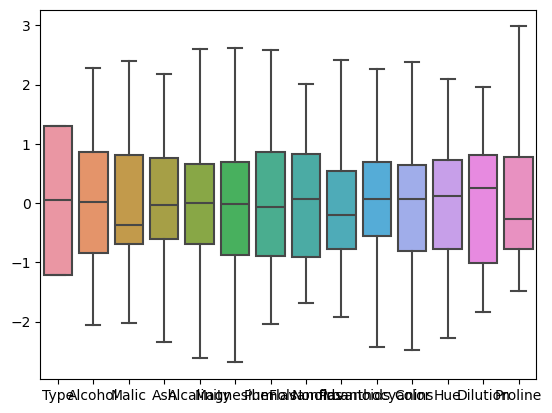

In [62]:
sns.boxplot(df_scaled)
#Hierarchical clustering on normalized data

In [65]:
# lets Perform K-means clustering based on alcohol and malic acid
from sklearn.cluster import KMeans 
kmean=KMeans(n_clusters=3, random_state=42)
y_kmeans = kmean.fit_predict(df_scaled[['Alcohol', 'Malic']])

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
kmean.fit_predict(df)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

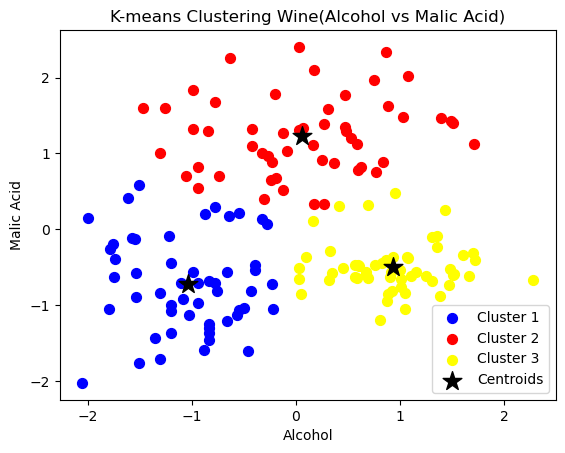

In [68]:
import matplotlib.pyplot as plt
# Get cluster centers (centroids)
centroids = kmean.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['Alcohol'], df_cluster1['Malic'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['Alcohol'], df_cluster2['Malic'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['Alcohol'], df_cluster3['Malic'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering Wine(Alcohol vs Malic Acid)')
plt.legend()
plt.show()

In [13]:
df['cluster']=kmean.fit_predict(df)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


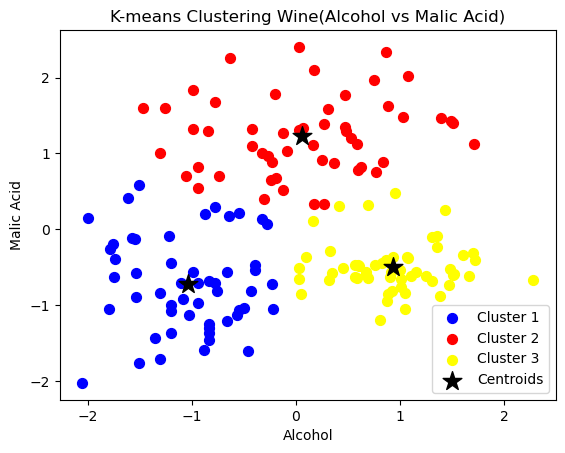

In [70]:
# Get cluster centers (centroids)
centroids = kmean.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['Alcohol'], df_cluster1['Malic'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['Alcohol'], df_cluster2['Malic'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['Alcohol'], df_cluster3['Malic'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering Wine(Alcohol vs Malic Acid)')
plt.legend()
plt.show()

In [73]:
#calculate silhoutte score average
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(df, y_kmeans)
print(sil_score)

0.08679816867069237


In [74]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, y_kmeans)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.8286940937796645
